In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [6]:
# Load the dataset
df = pd.read_csv("archive.zip")

# View first few rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Drop irrelevant columns
df_clean = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Encode Gender using Label Encoding
le = LabelEncoder()
df_clean["Gender"] = le.fit_transform(df_clean["Gender"])  # Female=0, Male=1

# Encode Geography using One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=["Geography"], drop_first=True)

# Check the cleaned data
df_clean.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [10]:
# Features and Target
X = df_clean.drop("Exited", axis=1)
y = df_clean["Exited"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



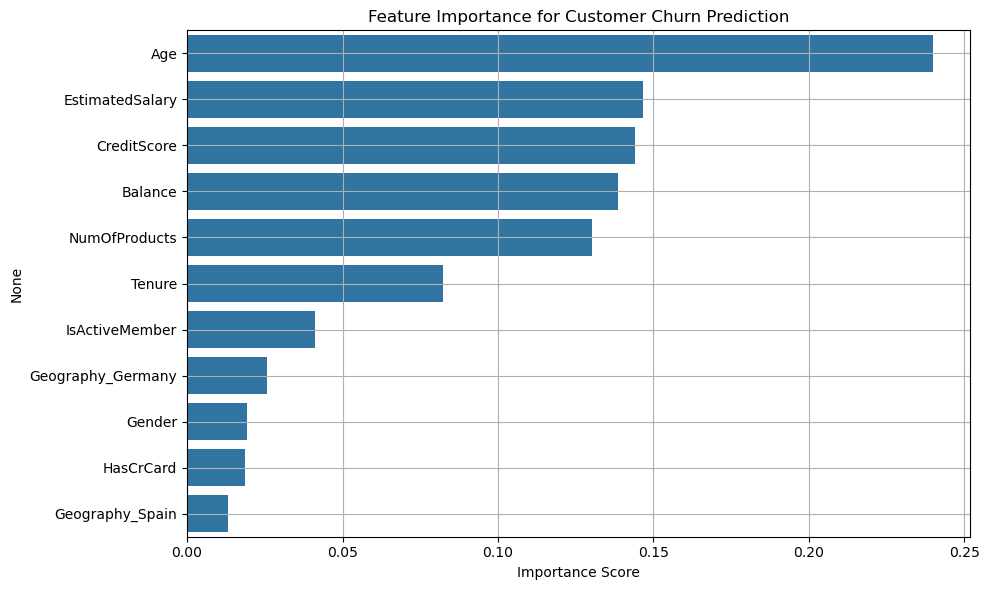

Age                  0.239783
EstimatedSalary      0.146638
CreditScore          0.144214
Balance              0.138613
NumOfProducts        0.130255
Tenure               0.082427
IsActiveMember       0.041110
Geography_Germany    0.025711
Gender               0.019258
HasCrCard            0.018722
dtype: float64

In [14]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance for Customer Churn Prediction")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display top 10
importances.head(10)
